# California Housing Dataset

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## California Housing Dataset - cleaning and exploration

In [36]:
housing = pd.read_csv("housing.csv")
housing.shape

(20640, 10)

In [37]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20176,-119.19,34.28,28.0,3231.0,524.0,1665.0,540.0,4.8583,224200.0,NEAR OCEAN
6082,-117.87,34.09,31.0,1484.0,327.0,927.0,317.0,3.6484,189600.0,<1H OCEAN
12511,-121.43,38.55,44.0,3514.0,714.0,1509.0,656.0,2.7333,100100.0,INLAND
18939,-122.10,38.24,13.0,7367.0,1042.0,3193.0,983.0,5.3102,195000.0,NEAR BAY
13597,-117.28,34.09,44.0,376.0,NaN,273.0,107.0,2.2917,90800.0,INLAND


In [38]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
housing = housing.dropna()
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [42]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

## Visualisation

Text(0, 0.5, 'Median house value')

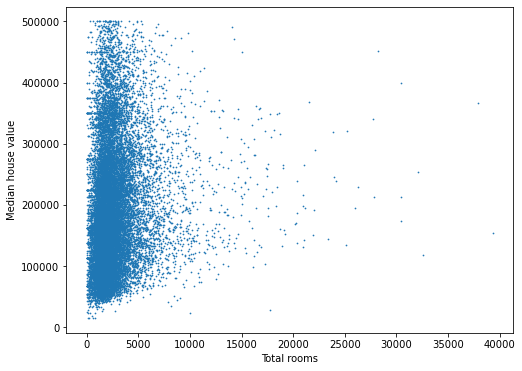

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(housing['total_rooms'], housing['median_house_value'], s= 0.5)
plt.xlabel('Total rooms')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

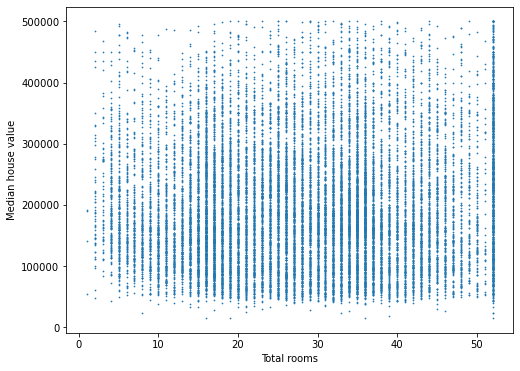

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(housing['housing_median_age'], housing['median_house_value'], s= 0.5)
plt.xlabel('Total rooms')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

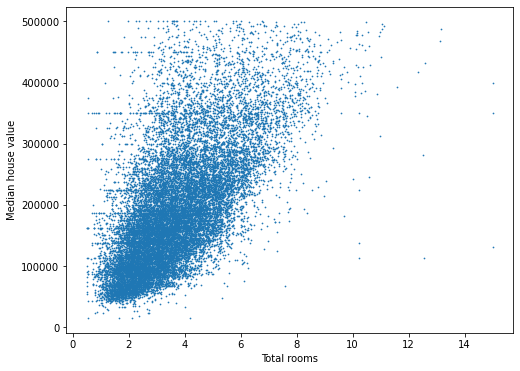

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(housing['median_income'], housing['median_house_value'], s= 0.5)
plt.xlabel('Total rooms')
plt.ylabel('Median house value')

<AxesSubplot:>

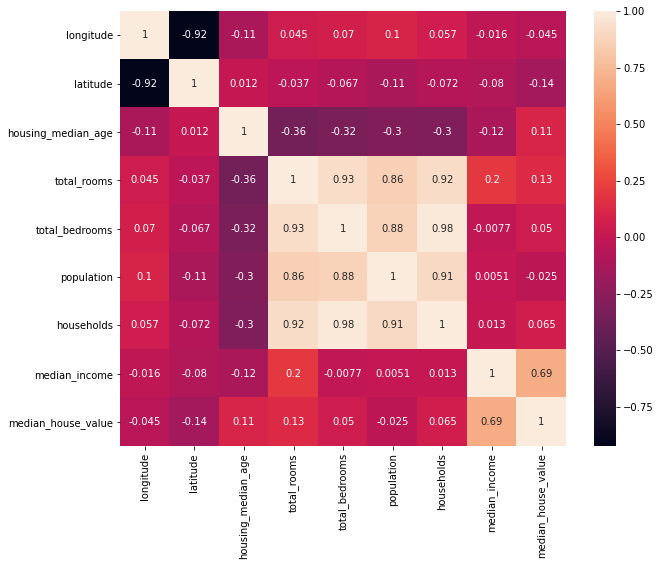

In [46]:
housing_corr = housing.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(housing_corr, annot=True)

## Linear Regression

In [47]:
housing = housing.drop(housing.loc[housing['median_house_value'] == 500001].index)

In [48]:
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

In [49]:
X = housing.drop('median_house_value', axis=1)
Y = housing['median_house_value']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linear_model = LinearRegression(normalize=True, fit_intercept=False).fit(x_train, y_train)
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.6138753288462567


In [56]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [57]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -2.123929e+06
ocean_proximity_NEAR BAY     -2.092263e+06
ocean_proximity_<1H OCEAN    -2.084940e+06
ocean_proximity_NEAR OCEAN   -2.081500e+06
ocean_proximity_ISLAND       -1.918779e+06
longitude                    -2.429625e+04
latitude                     -2.222554e+04
population                   -2.900249e+01
total_rooms                  -7.411602e+00
households                    4.162121e+01
total_bedrooms                9.132615e+01
housing_median_age            9.398217e+02
median_income                 3.875119e+04
dtype: float64


In [58]:
y_pred = linear_model.predict(x_test)

In [59]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
20045,57130.807797,43100.0
3972,215961.796614,222800.0
15551,178568.177708,171600.0
1046,70209.585648,157200.0
1339,135270.542644,103900.0
18607,379105.239192,394900.0
7454,194736.137748,166800.0
10167,319365.983237,459600.0
7036,206290.208889,165000.0
3248,96939.961168,52200.0


In [61]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6088665022263449


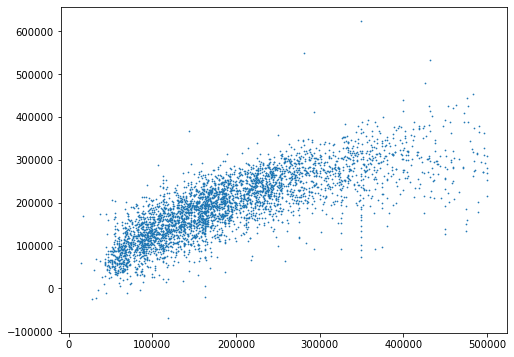

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y_test, y_pred, s= 0.5)
plt.show()

In [69]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

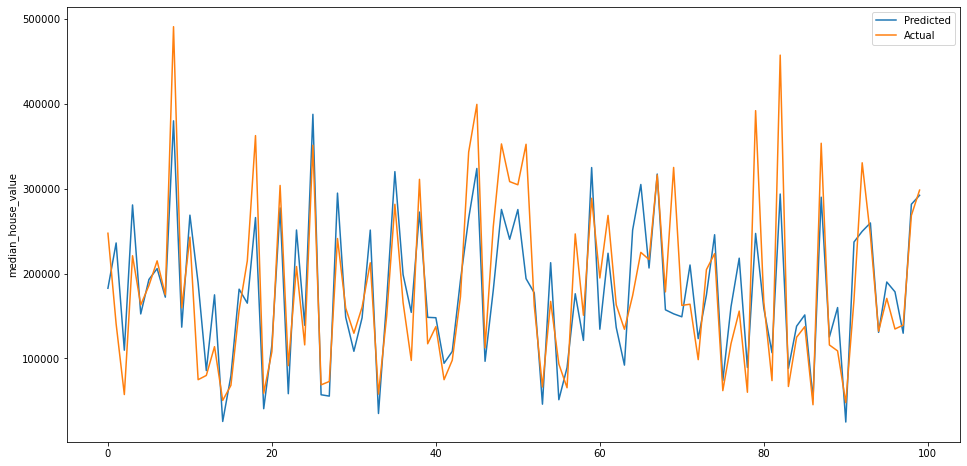

In [71]:
plt.figure(figsize = (16,8))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()

## Logistic Regression

In [78]:
median = housing['median_house_value'].median()
median

173800.0

In [79]:
housing['above_median'] = (housing['median_house_value'] - median) > 0

In [81]:
X = housing.drop(['median_house_value', 'above_median'], axis=1)
Y = housing['above_median']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training_score : " , logistic_model.score(x_train, y_train))
y_pred = logistic_model.predict(x_test)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

Training_score :  0.8213093709884467


,predicted,actual
8363,False,False
5108,False,False
15205,True,True
19676,False,False
6182,True,True
4540,False,False
5468,True,True
14154,False,True
18157,True,True
13906,False,False


In [85]:
from sklearn.metrics import accuracy_score
print("Testing_score : ", accuracy_score(y_test, y_pred))

Testing_score :  0.8195121951219512
